In [3]:
import numpy as np
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/yokey/Downloads/diabetes.csv") 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
 # Replacing 0 values of Glucose  
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())  
  
# Filling 0 values of Blood Pressure  
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())   
  
# Replacing 0 values in BMI  
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())  
  
# Replacing the missing values of Insulin and SkinThickness  
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  
data.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


Text(0.5, 1.0, 'Correlation heatmap')

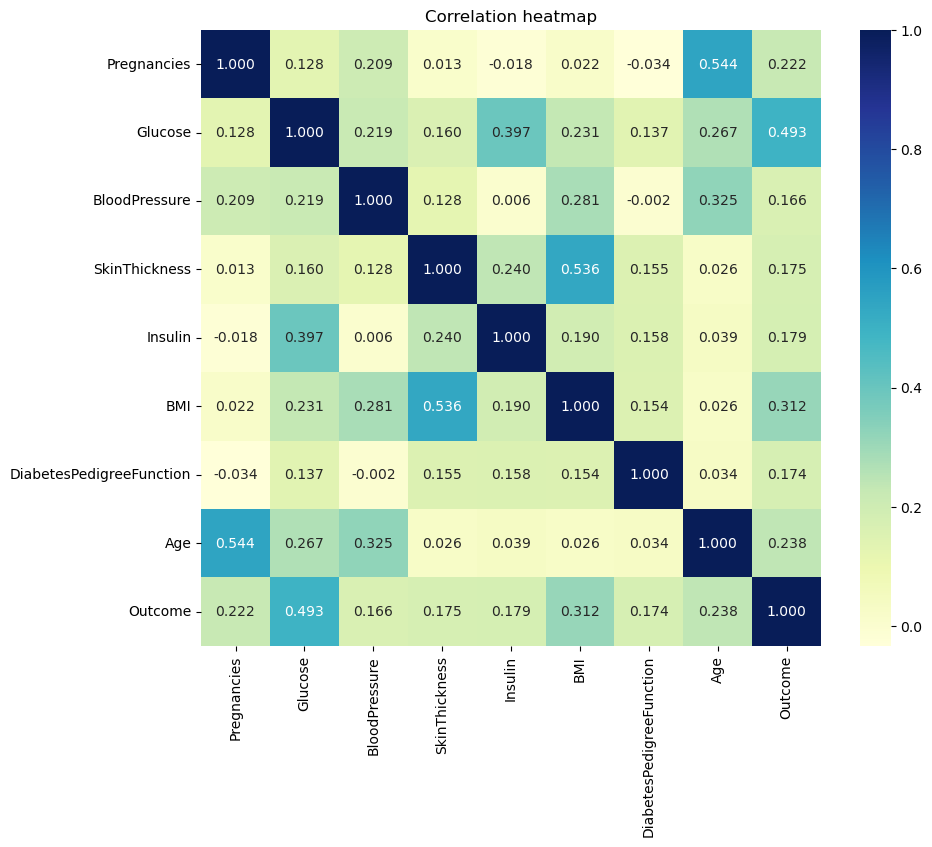

In [6]:
plt.figure(figsize = (10, 8))  
sns.heatmap(data.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")  
plt.title("Correlation heatmap")  

In [42]:
# Splitting the dependent and independent features  
X = data.drop(["Outcome"], axis = 1)  
Y = data["Outcome"]  
  
# Splitting the dataset into the training and testing dataset  
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)  
  

In [43]:
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(X_train,Y_train)

SVC(kernel='linear')

In [44]:
y_pred=sv.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

0.8051948051948052
